In [ ]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ" -O "diabetes.csv"

--2023-11-20 14:27:11--  https://drive.google.com/uc?export=download&id=1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ
Resolving drive.google.com (drive.google.com)... 64.233.188.100, 64.233.188.139, 64.233.188.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vcpe8k62ee05gjehavt5uun1cvhei6j6/1700490375000/14399582566128250596/*/1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ?e=download&uuid=7b18cef2-e728-47e6-88b2-0ce556883d7b [following]
--2023-11-20 14:27:12--  https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vcpe8k62ee05gjehavt5uun1cvhei6j6/1700490375000/14399582566128250596/*/1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ?e=download&uuid=7b18cef2-e728-47e6-88b2-0ce556883d7b
Resolving doc-0o-c4-docs.googleusercontent.com (doc-0o-c4-docs.googleusercontent.com)... 173.194.174.132, 2404

In [ ]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
feature_cols = ['pregnant','skin', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
X = pima[feature_cols] # Features
y = pima.label # Target variable
pima.head()

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Let's use `t-sne` to project the data to 2D

In [ ]:
from sklearn.manifold import TSNE
Embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=5).fit_transform(X)
# Embedded = TSNE(n_components=2, learning_rate='auto',
#                     init='random', perplexity=3).fit_transform(X_train)
colorMp = list(y.values)

In [ ]:
print(Embedded.shape)

(768, 2)


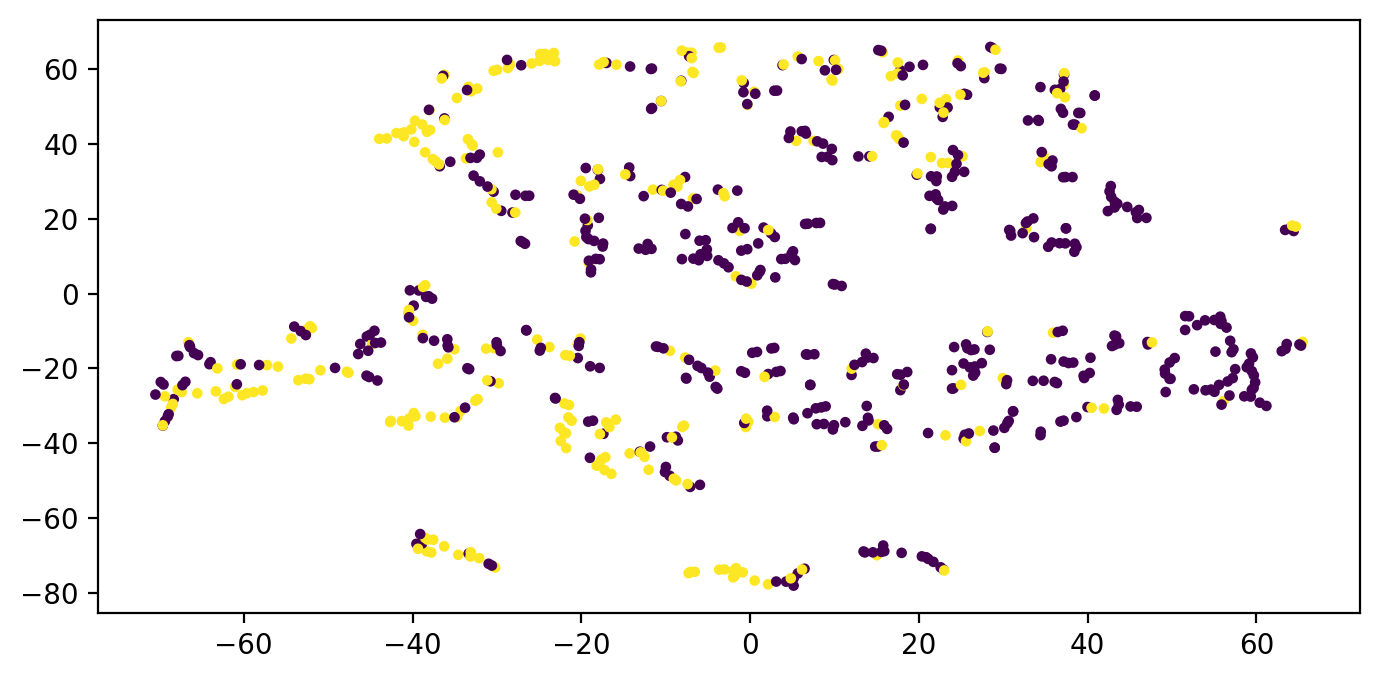

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Embedded[:,0],Embedded[:,1],c=colorMp,s=8)

## Let's see how *K-Means* group the data

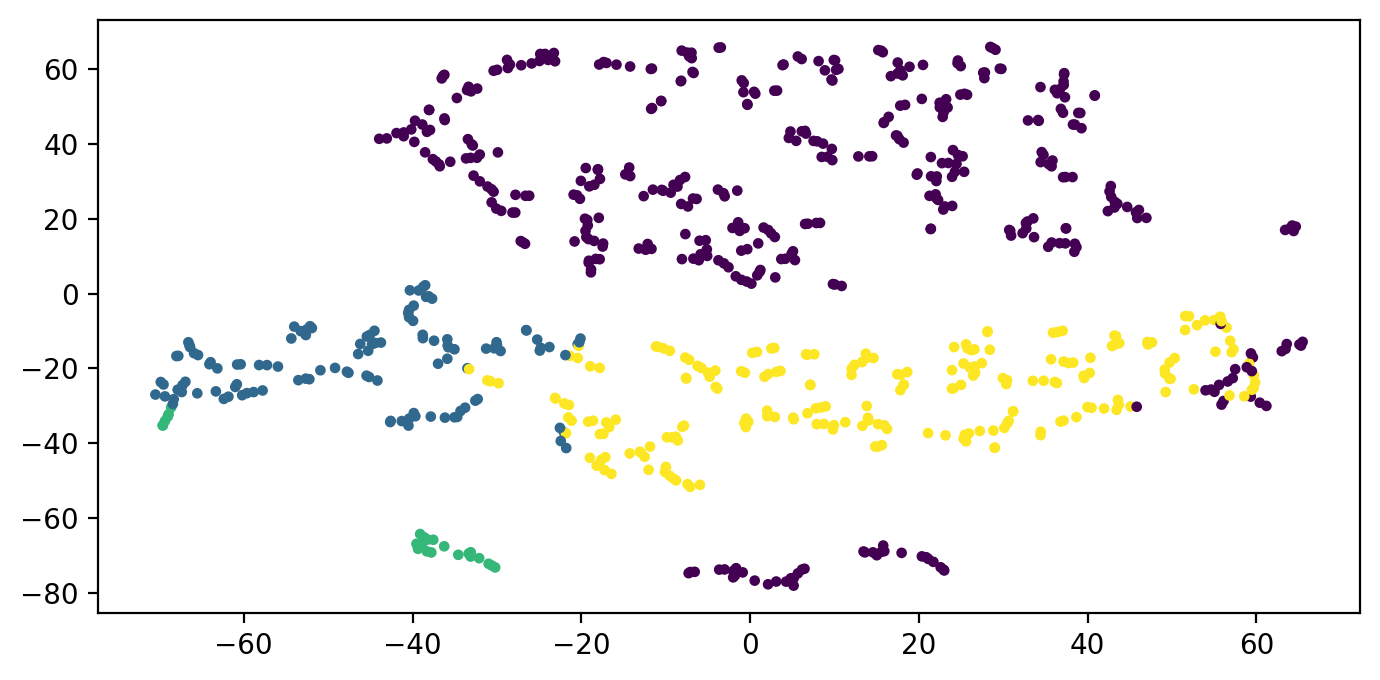

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
plt.figure()
plt.scatter(Embedded[:,0],Embedded[:,1],c=kmeans.labels_,s=8)


#### Let's validate the clustering solution

### How if you want to use brute-force search for the best $k$

SSE of Given data when k = 0 is 11615812.918327227
SSE of Given data when k = 1 is 5142376.455984384
SSE of Given data when k = 2 is 2949272.971246644
SSE of Given data when k = 3 is 2151320.938003855
SSE of Given data when k = 4 is 1844162.9720960227
SSE of Given data when k = 5 is 1467132.5326951921
SSE of Given data when k = 6 is 1305863.1373583395
SSE of Given data when k = 7 is 1160666.4650578445
SSE of Given data when k = 8 is 1089479.8127884918
SSE of Given data when k = 9 is 931438.5137779742
SSE of Given data when k = 10 is 876670.8634169715
SSE of Given data when k = 11 is 844848.408742154
SSE of Given data when k = 12 is 824080.5227799789
SSE of Given data when k = 13 is 784796.2915696912
SSE of Given data when k = 14 is 719021.4436112901
SSE of Given data when k = 15 is 694118.4798726318
SSE of Given data when k = 16 is 662577.5585382062
SSE of Given data when k = 17 is 632182.9285026715
SSE of Given data when k = 18 is 608946.000522736
SSE of Given data when k = 19 is 5967

<StemContainer object of 3 artists>

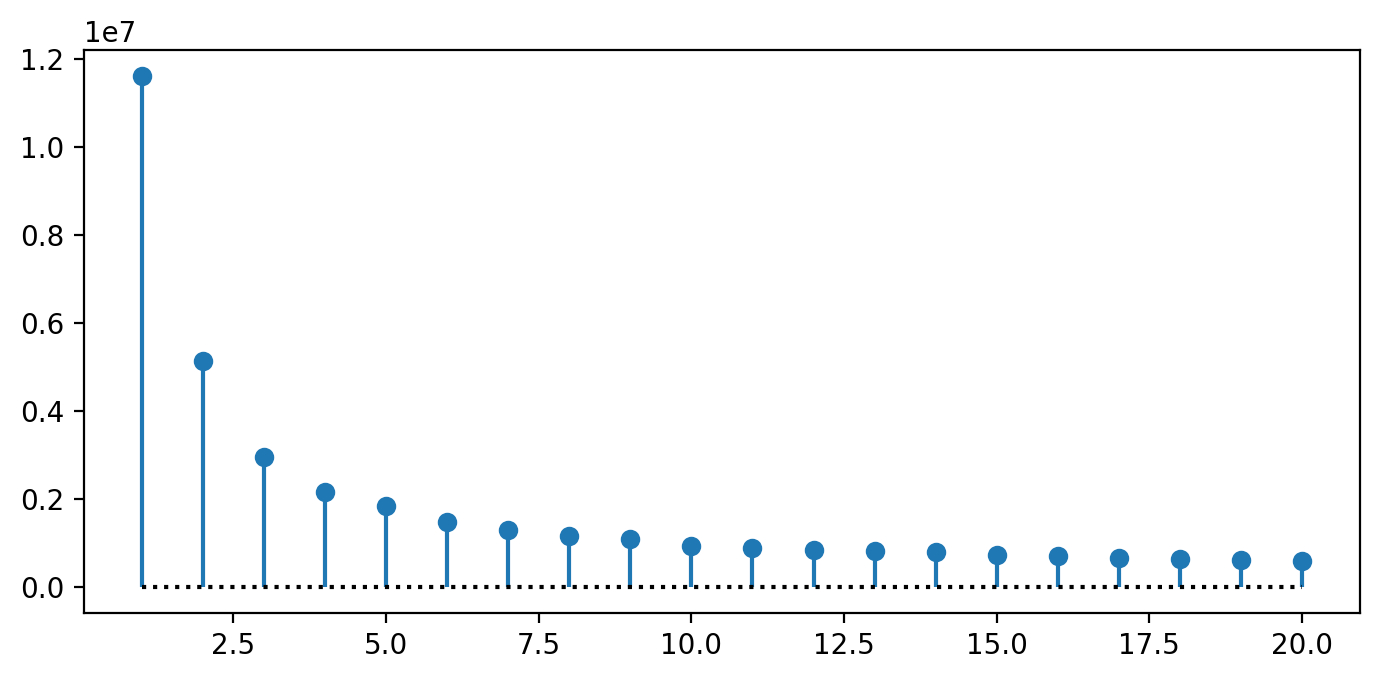

In [ ]:
from sklearn.cluster import KMeans
sseLst = []
for k in range(20):
  kmeans = KMeans(n_clusters=k+1, random_state=0, n_init="auto").fit(X)
  sse = kmeans.inertia_
  sseLst.append(sse)
  print(F"SSE of Given data when k = {k} is {sse}")
plt.figure()
plt.stem(np.arange(1,21,1), sseLst,basefmt = 'k:')


### Let's use the sorted similarity matrix to validate the clustering results.

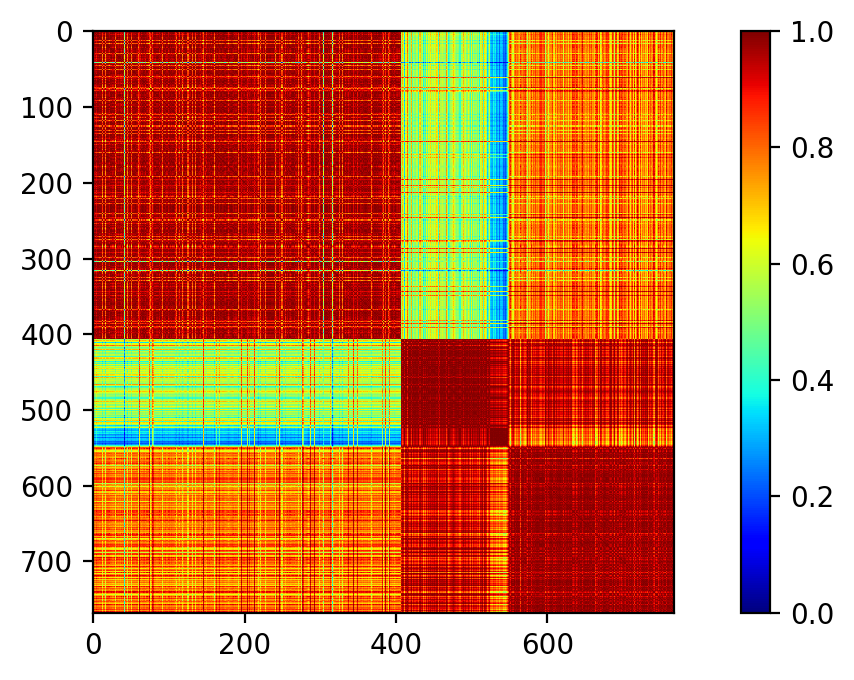

In [ ]:
# ported from: https://medium.com/@devamsheth20/statistical-test-for-k-means-cluster-validation-in-python-using-sorted-similarity-matrix-1e644ab029c0
import numpy as np
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
clf = kmeans

# pairwisedist = pairwise_distances(scaleddf, metric='cosine')
pairwisedist = pairwise_distances(X, metric='cosine')

# sorting by labels
sorted_pairwisedist = pairwisedist[np.argsort(clf.labels_)][:, np.argsort(clf.labels_)]
labels = clf.labels_[np.argsort(clf.labels_)]

# keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1- sorted_pairwisedist / np.max(sorted_pairwisedist)

#plotting
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sorted_similarity,cmap ='jet',interpolation='none')
plt.colorbar()


#### Another way to validate is to compare with random points

In [ ]:
corrhist =[]
ssehist =[]
data = X.copy()
ranges = [(data[col].min(), data[col].max()) for col in data.columns] # specify different ranges for each column
for seed in range(0,100):
  np.random.seed(seed)
  randomdata = np.random.default_rng().uniform(low=ranges[0][0], high=ranges[0][1], size=(100, 1))
  for r in ranges[1:]:
      randomdata = np.concatenate((randomdata, np.random.randint(low=r[0], high=r[1], size=(100, 1))), axis=1)
  randomdf = pd.DataFrame(randomdata)

#scaling random df
  # scaledranddf = scaler.fit_transform(randomdf)
  scaledranddf = randomdf
#clustering each df
  clfr = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(scaledranddf)
  labels = clfr.labels_[np.argsort(clfr.labels_)]

#distance matrix for each random df
  pairwisedistr = pairwise_distances(scaledranddf, metric='cosine')
  sorted_pairwisedistr = pairwisedist[np.argsort(labels)][:, np.argsort(labels)]

#Ideal Similarity matrix for each randomdf
  incidence_matrixr = np.zeros_like(sorted_pairwisedistr)
  for i in range(len(labels)):
      for j in range(len(labels)):
          incidence_matrixr[i,j] = int(labels[i] == labels[j])

#calculating correlation of proximity matrix(distance) and Incidence matrix (Ideal similarity)
  corrhist.append(np.corrcoef(sorted_pairwisedistr.flatten(), incidence_matrixr.flatten())[0, 1])
  ssehist.append(clfr.inertia_)


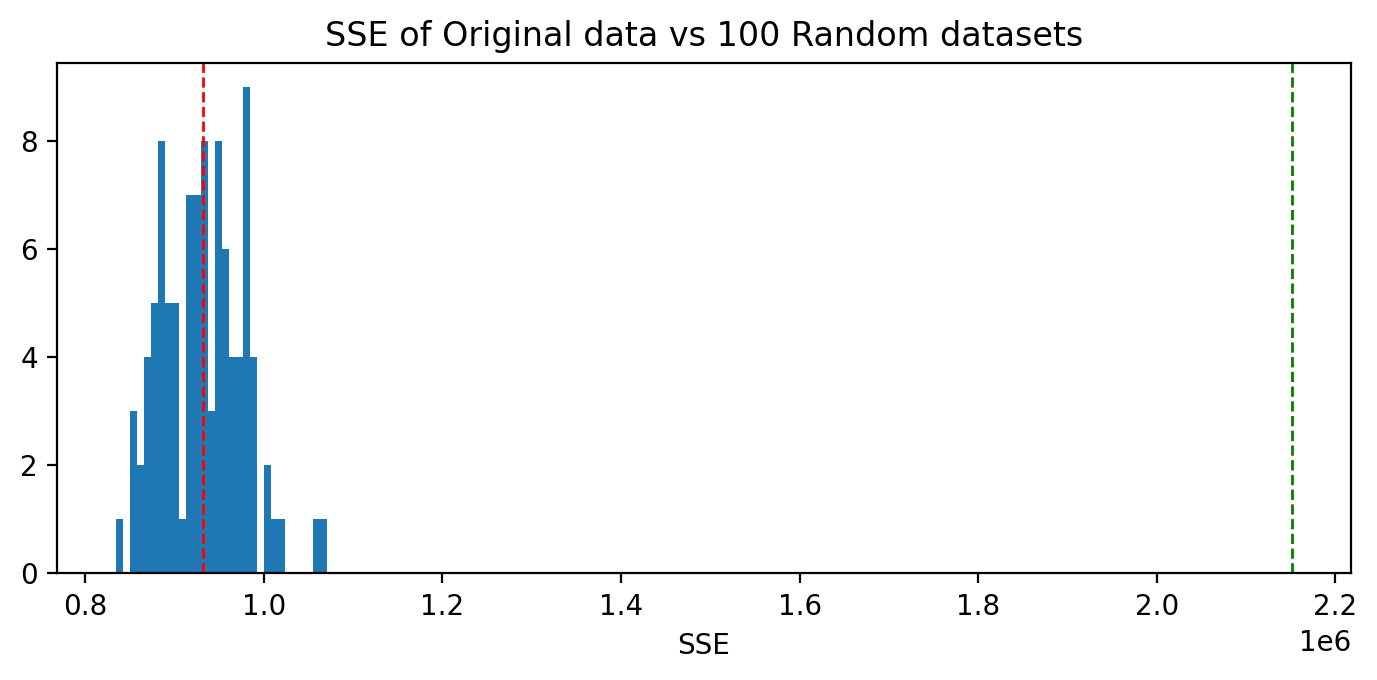

In [ ]:

plt.hist(ssehist,bins=30)
clf = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
plt.axvline(np.mean(ssehist),color='red',linestyle='dashed',linewidth=1)
plt.axvline(clf.inertia_, color='green',linestyle='dashed',linewidth=1)
plt.title('SSE of Original data vs 100 Random datasets')

plt.xlabel('SSE')

plt.show()



The result indicates that the internal grouping structure of the original dataset may be unclear.

## Let's see how DBSCAN group the data

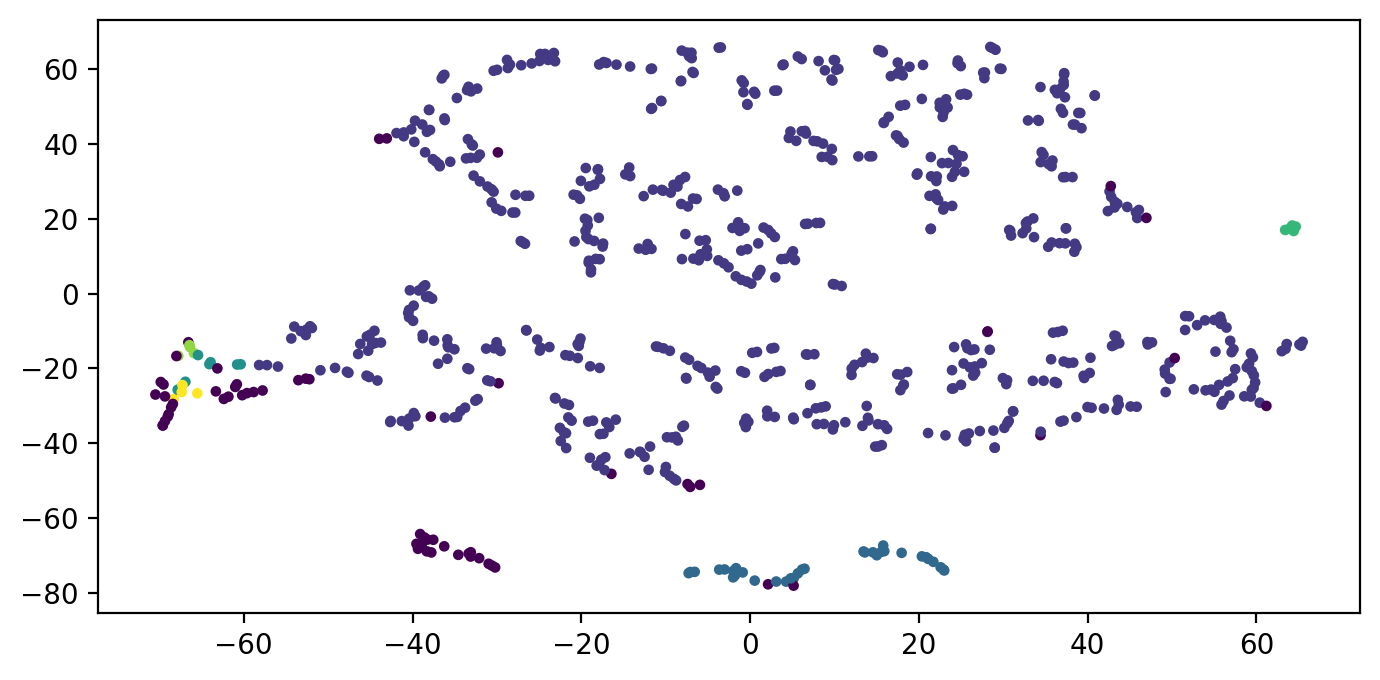

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=30, min_samples=5).fit(X)
plt.scatter(Embedded[:,0],Embedded[:,1],c=clustering.labels_,s=8)

Not that good actually...

## Let's try hierachical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
# clustering = AgglomerativeClustering().fit(X)
# plt.scatter(Embedded[:,0],Embedded[:,1],c=clustering.labels_,s=8)

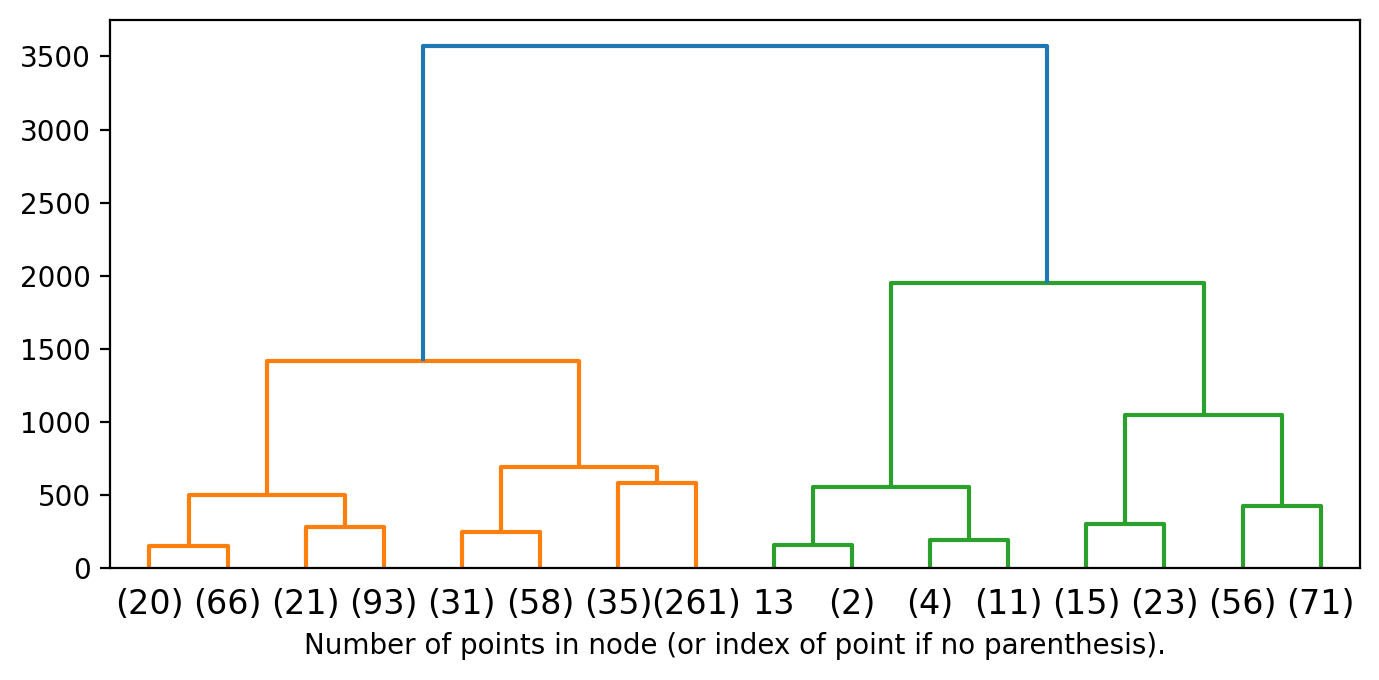

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


It seems like that 4 cluster is a good choice

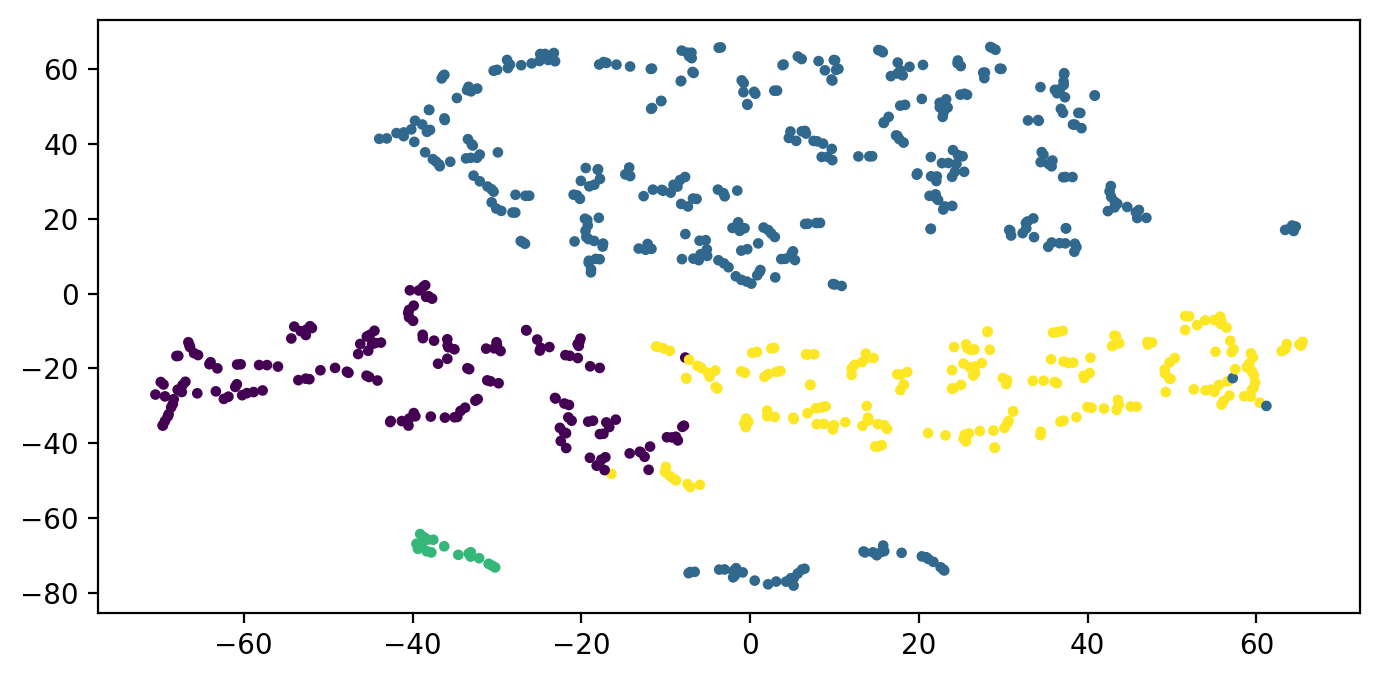

In [ ]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=4)

model = model.fit(X)
plt.scatter(Embedded[:,0],Embedded[:,1],c=model.labels_,s=8)

### Let's try to validate

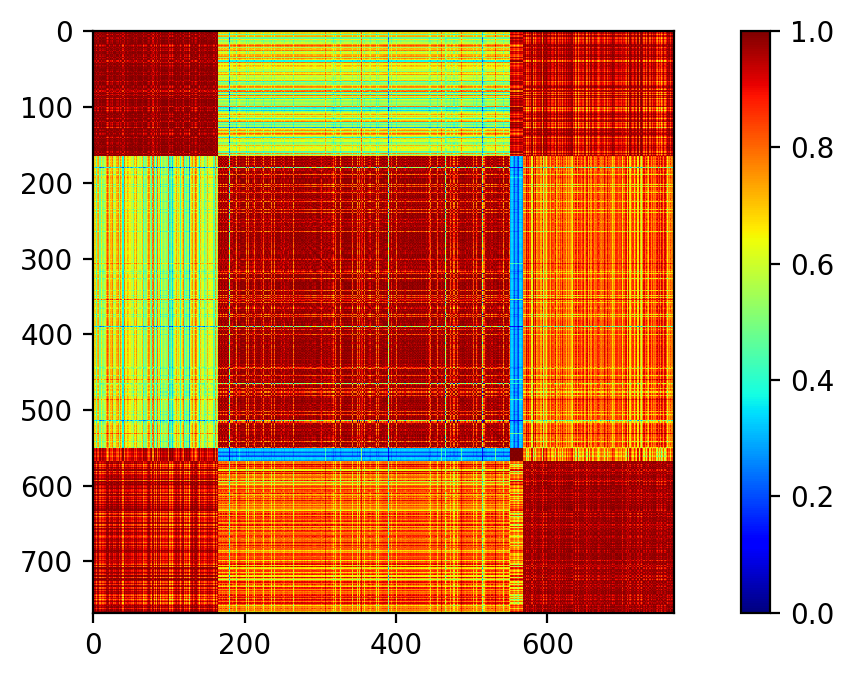

In [ ]:
# ported from: https://medium.com/@devamsheth20/statistical-test-for-k-means-cluster-validation-in-python-using-sorted-similarity-matrix-1e644ab029c0
import numpy as np
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans

model = AgglomerativeClustering(distance_threshold=None, n_clusters=4)
model = model.fit(X)
clf = model

# pairwisedist = pairwise_distances(scaleddf, metric='cosine')
pairwisedist = pairwise_distances(X, metric='cosine')

# sorting by labels
sorted_pairwisedist = pairwisedist[np.argsort(clf.labels_)][:, np.argsort(clf.labels_)]
labels = clf.labels_[np.argsort(clf.labels_)]

# keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1- sorted_pairwisedist / np.max(sorted_pairwisedist)

#plotting
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sorted_similarity,cmap ='jet',interpolation='none')
plt.colorbar()


## Direct Visualization of Clusters

In [ ]:
X2 = X.copy()
X2['cluster'] = (model.labels_+1)*100
X2['True_Label'] = (y+1)*100
X2

,pregnant,skin,insulin,bmi,age,glucose,bp,pedigree,cluster,True_Label
0,6,35,0,33.6,50,148,72,0.627,200,200
1,1,29,0,26.6,31,85,66,0.351,200,100
2,8,0,0,23.3,32,183,64,0.672,200,200
3,1,23,94,28.1,21,89,66,0.167,400,100
4,0,35,168,43.1,33,137,40,2.288,100,200
...,...,...,...,...,...,...,...,...,...,...
763,10,48,180,32.9,63,101,76,0.171,100,100
764,2,27,0,36.8,27,122,70,0.340,200,100
765,5,23,112,26.2,30,121,72,0.245,400,100
766,1,0,0,30.1,47,126,60,0.349,200,200


In [ ]:
X2 = X2.sort_values(['cluster','True_Label'])
X_new = X2.iloc[:,:]
X_new

,pregnant,skin,insulin,bmi,age,glucose,bp,pedigree,cluster,True_Label
20,3,41,235,39.3,27,126,88,0.704,100,100
35,4,33,192,24.0,33,103,60,0.966,100,100
54,7,42,342,34.7,42,150,66,0.718,100,100
63,2,34,128,25.4,24,141,58,0.699,100,100
71,5,35,140,28.6,26,139,64,0.411,100,100
...,...,...,...,...,...,...,...,...,...,...
638,7,32,91,40.9,32,97,76,0.871,400,200
659,3,31,70,34.2,27,80,82,1.292,400,200
709,2,32,160,38.0,23,93,64,0.674,400,200
730,3,23,79,28.4,34,130,78,0.323,400,200


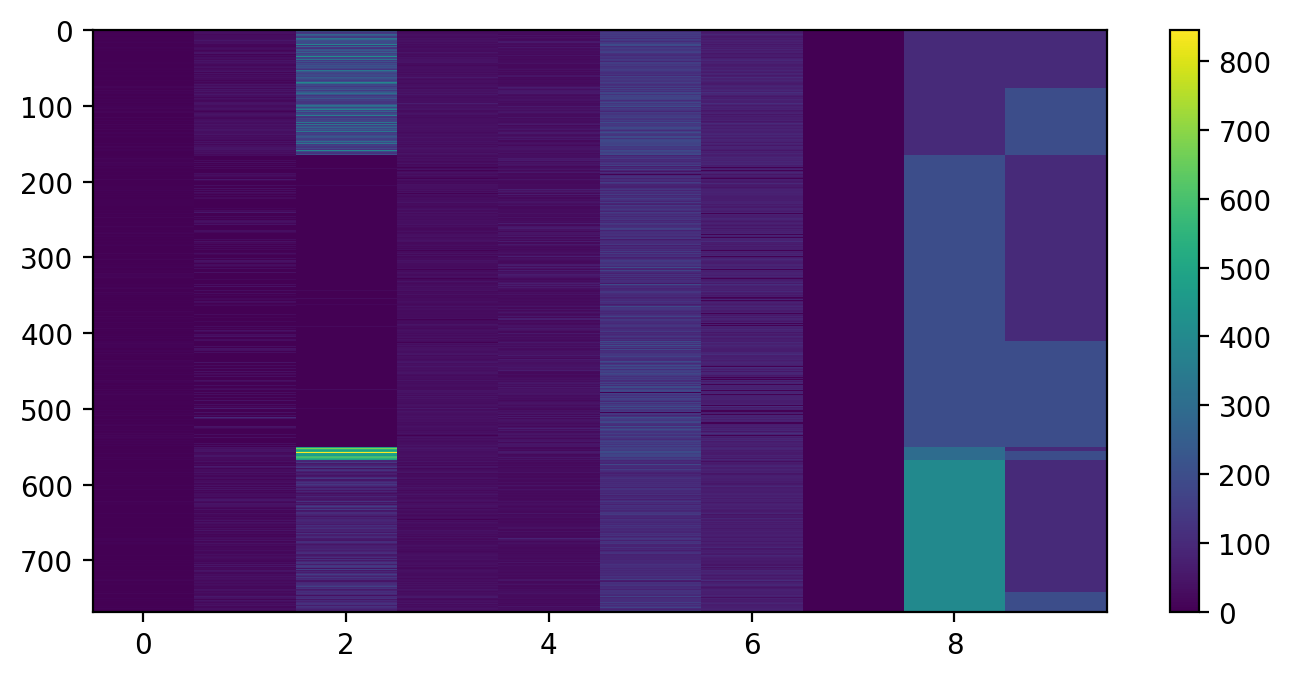

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.imshow(X_new.values, aspect='auto',interpolation='none')
plt.colorbar()
plt.show()

## Inspect the average of all records in all clusters.

In [ ]:
X_new.columns

Index(['pregnant', 'skin', 'insulin', 'bmi', 'age', 'glucose', 'bp',
       'pedigree', 'cluster', 'True_Label'],
      dtype='object')

In [ ]:
ClusterAverage = X_new.groupby(['cluster'])['pregnant', 'skin', 'insulin', 'bmi', 'age', 'glucose', 'bp',
       'pedigree'].mean()
ClusterAverage

<ipython-input-164-d9999186c6ed>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,pregnant,skin,insulin,bmi,age,glucose,bp,pedigree
cluster,,,,,,,,
100,4.018182,30.903030,207.018182,34.741212,34.224242,141.393939,73.072727,0.571121
200,4.392208,11.940260,0.620779,30.955065,35.535065,118.716883,67.394805,0.421213
300,3.111111,35.666667,548.833333,36.961111,34.555556,165.833333,73.444444,0.660667
400,2.715000,27.170000,85.050000,31.275000,27.895000,104.130000,68.735000,0.470535


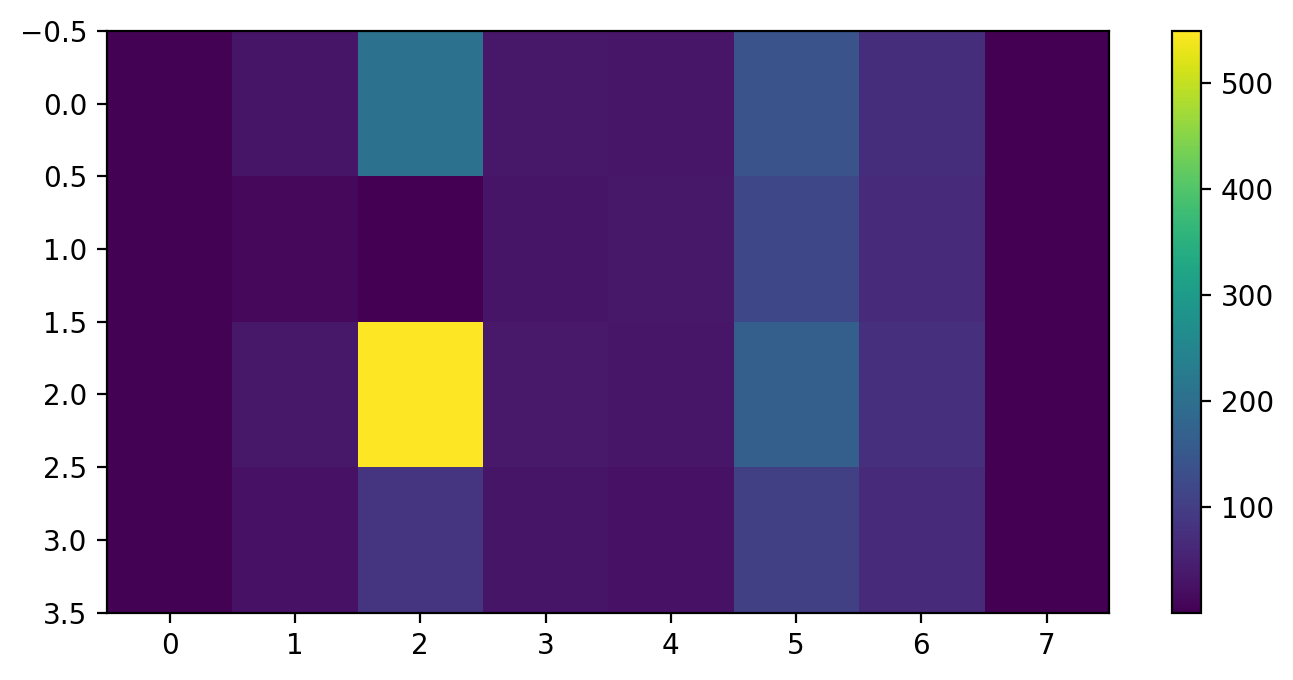

In [ ]:
plt.imshow(ClusterAverage.values, aspect='auto',interpolation='none')
plt.colorbar()
plt.show()

#### Let's try another popular diagram, the Radar Plot.

In [ ]:
from scipy import stats

values = np.array([])
variables = []
clusters = []
df = ClusterAverage.copy()
# for c in df.columns:
#   df[c] = stats.zscore(df[c])

# variables.append(ClusterAverage.columns.values)
for r in range(df.shape[0]):
  rowContent = df.iloc[r,:]
  values = np.append(values, rowContent, axis=0)
  variables.extend(df.columns.values.tolist())
  clusters.extend([str(r+1)]*df.shape[1])
  # values.append(rowContent.values)

df = pd.DataFrame(dict(
    value = values,
    variable = variables,
    group = clusters))

fig = px.line_polar(df, r = 'value', theta = 'variable', line_close = True,
                    color = 'group')
fig.update_traces(fill = 'toself')

fig.show()

In [ ]:
from scipy import stats

values = np.array([])
variables = []
clusters = []
df = ClusterAverage.copy()
for c in df.columns:
  df[c] = stats.zscore(df[c])

# variables.append(ClusterAverage.columns.values)
for r in range(df.shape[0]):
  rowContent = df.iloc[r,:]
  values = np.append(values, rowContent, axis=0)
  variables.extend(df.columns.values.tolist())
  clusters.extend([str(r+1)]*df.shape[1])
  # values.append(rowContent.values)

df = pd.DataFrame(dict(
    value = values,
    variable = variables,
    group = clusters))

fig = px.line_polar(df, r = 'value', theta = 'variable', line_close = True,
                    color = 'group')
fig.update_traces(fill = 'toself',textposition = 'top center')

fig.show()

## Let's try another way of grouping the clustered dataset w.r.t. the labels.

In [ ]:
ClusterAverage = X_new.groupby(['cluster','True_Label'])['pregnant', 'skin', 'insulin', 'bmi', 'age', 'glucose', 'bp',
       'pedigree'].mean()
ClusterAverage

<ipython-input-110-7e019a90e8c2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ClusterAverage = X_new.groupby(['cluster','True_Label'])['pregnant', 'skin', 'insulin', 'bmi', 'age', 'glucose', 'bp',


pregnant       skin     insulin        bmi        age  \
cluster True_Label                                                          
100     100         2.973684  28.526316  215.552632  33.272368  30.355263   
        200         4.910112  32.932584  199.730337  35.995506  37.528090   
200     100         3.897959  11.616327    0.800000  28.834286  34.085714   
        200         5.257143  12.507143    0.307143  34.666429  38.071429   
300     100         2.166667  39.000000  562.333333  41.400000  27.000000   
        200         3.583333  34.000000  542.083333  34.741667  38.333333   
400     100         2.630058  26.497110   83.491329  30.697110  27.601156   
        200         3.259259  31.481481   95.037037  34.977778  29.777778   

                       glucose         bp  pedigree  
cluster True_Label                                   
100     100         131.526316  70.868421  0.513908  
        200         149.820225  74.955056  0.619978  
200     100         107.722449  67.053061  0.378808  
        200         137.957143  67.992857  0.495421  
300     100         161.000000  77.000000  0.788667  
        200         168.250000  71.666667  0.596667  
400     100         101.942197  68.300578  0.452428  
        200         118.148148  71.518519  0.586556

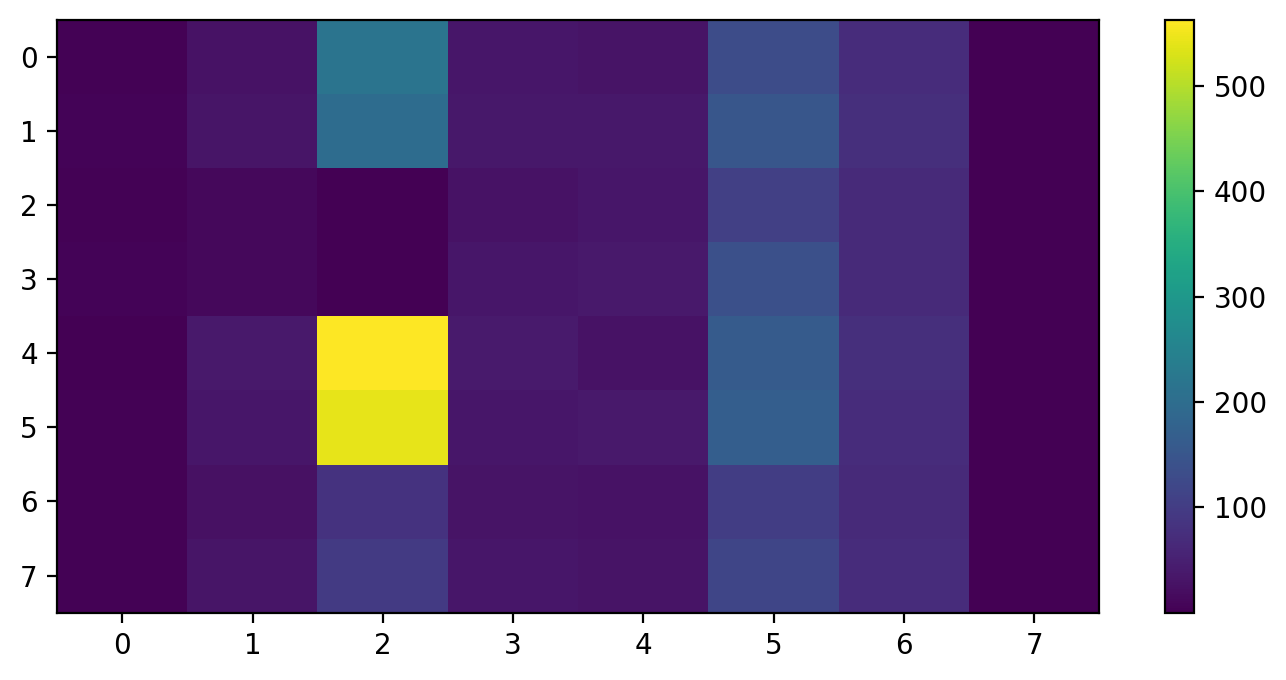

In [ ]:
plt.imshow(ClusterAverage.values, aspect='auto',interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
ClusterAverage = X_new.groupby(['True_Label','cluster'])['pregnant', 'skin', 'insulin', 'bmi', 'age', 'glucose', 'bp',
       'pedigree'].mean()
ClusterAverage


<ipython-input-112-5475009dd08b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ClusterAverage = X_new.groupby(['True_Label','cluster'])['pregnant', 'skin', 'insulin', 'bmi', 'age', 'glucose', 'bp',


pregnant       skin     insulin        bmi        age  \
True_Label cluster                                                          
100        100      2.973684  28.526316  215.552632  33.272368  30.355263   
           200      3.897959  11.616327    0.800000  28.834286  34.085714   
           300      2.166667  39.000000  562.333333  41.400000  27.000000   
           400      2.630058  26.497110   83.491329  30.697110  27.601156   
200        100      4.910112  32.932584  199.730337  35.995506  37.528090   
           200      5.257143  12.507143    0.307143  34.666429  38.071429   
           300      3.583333  34.000000  542.083333  34.741667  38.333333   
           400      3.259259  31.481481   95.037037  34.977778  29.777778   

                       glucose         bp  pedigree  
True_Label cluster                                   
100        100      131.526316  70.868421  0.513908  
           200      107.722449  67.053061  0.378808  
           300      161.000000  77.000000  0.788667  
           400      101.942197  68.300578  0.452428  
200        100      149.820225  74.955056  0.619978  
           200      137.957143  67.992857  0.495421  
           300      168.250000  71.666667  0.596667  
           400      118.148148  71.518519  0.586556

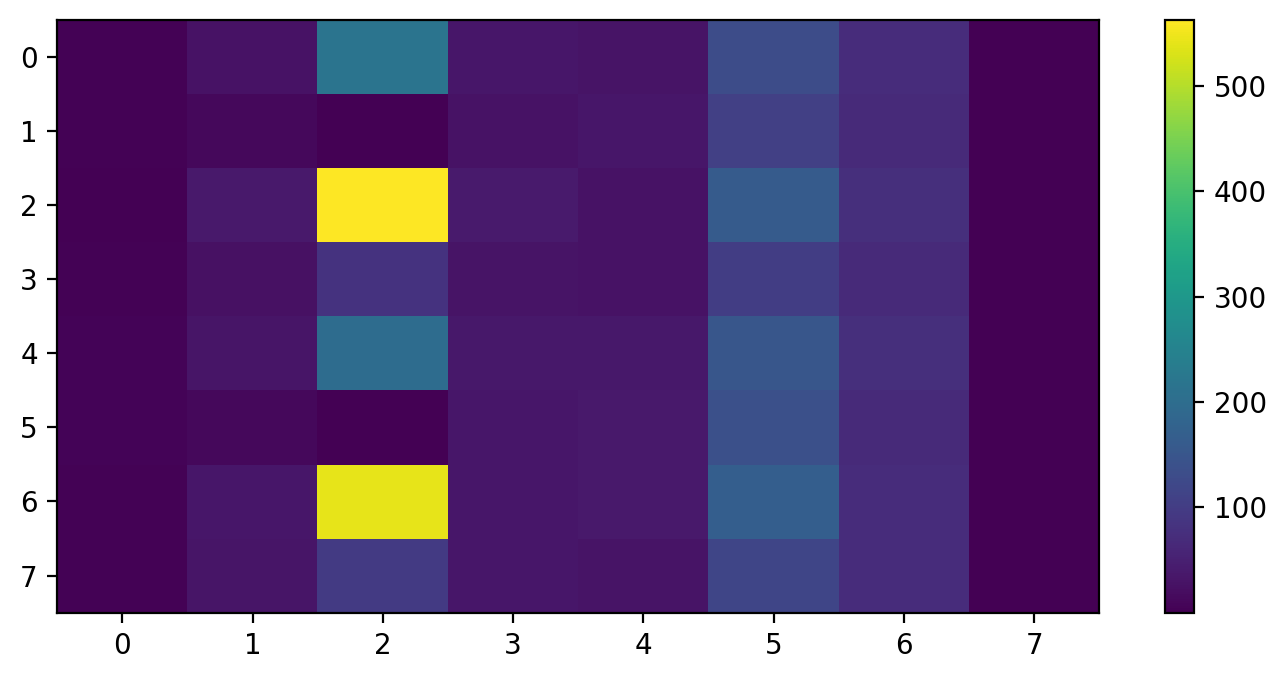

In [ ]:
# plt.imshow(ClusterAverage.values, aspect='auto',interpolation='none', origin="lower")
plt.imshow(ClusterAverage.values, aspect='auto',interpolation='none')

plt.colorbar()
plt.show()

## Cluster visualization using the Seaborn library

\Let's fetch 3 samples from each group for visualization purpose

In [ ]:
X_vis = X_new.groupby(['True_Label','cluster']).sample(n=3).sort_values(['True_Label','cluster'])

In [ ]:
X_vis_true_label = X_vis.loc[:,'True_Label']
X_vis_cluster = X_vis.loc[:,'cluster']
X_vis = X_vis.drop(columns=['cluster','True_Label'])

In [ ]:
X_vis.shape

(24, 8)

Let's give it a trial.

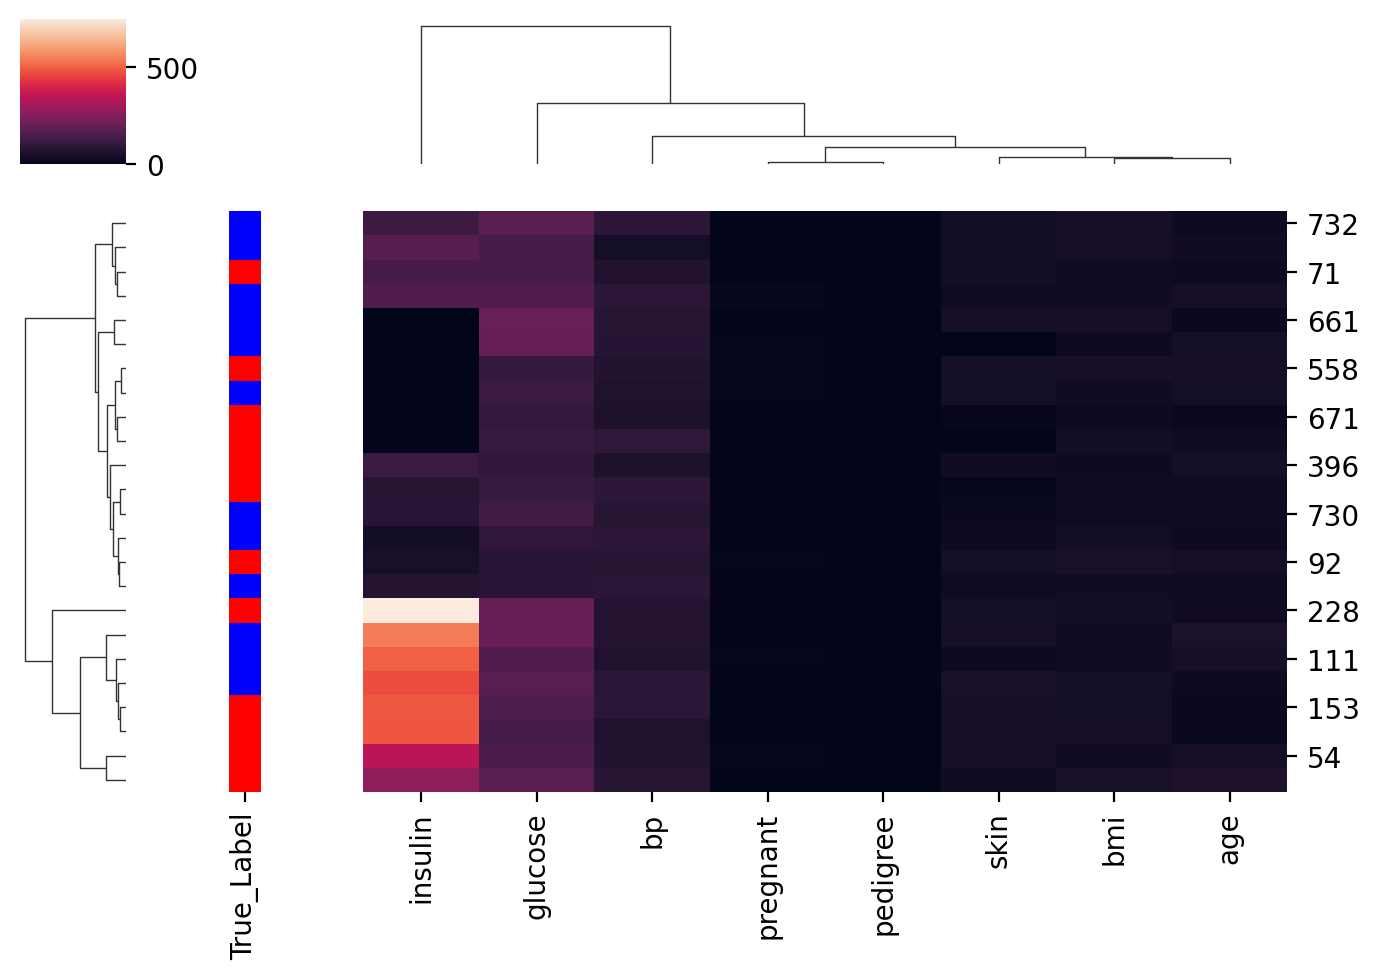

In [ ]:
import seaborn as sns

lut = dict(zip(X_vis_true_label.unique(), "rbg"))
row_colors = X_vis_true_label.map(lut)

g = sns.clustermap(
    X_vis,
    figsize=(7, 5),
    dendrogram_ratio=(.1, .2),
    # cbar_pos=(0, .2, .03, .4),
    # cmap="vlag", vmin=0, vmax=400,
    # cbar_pos=(.02, .32, .03, .2),
    row_colors=row_colors
)
# g.ax_col_dendrogram.remove()


It looks like that some columns contain only very small values and thus hard to visualize..

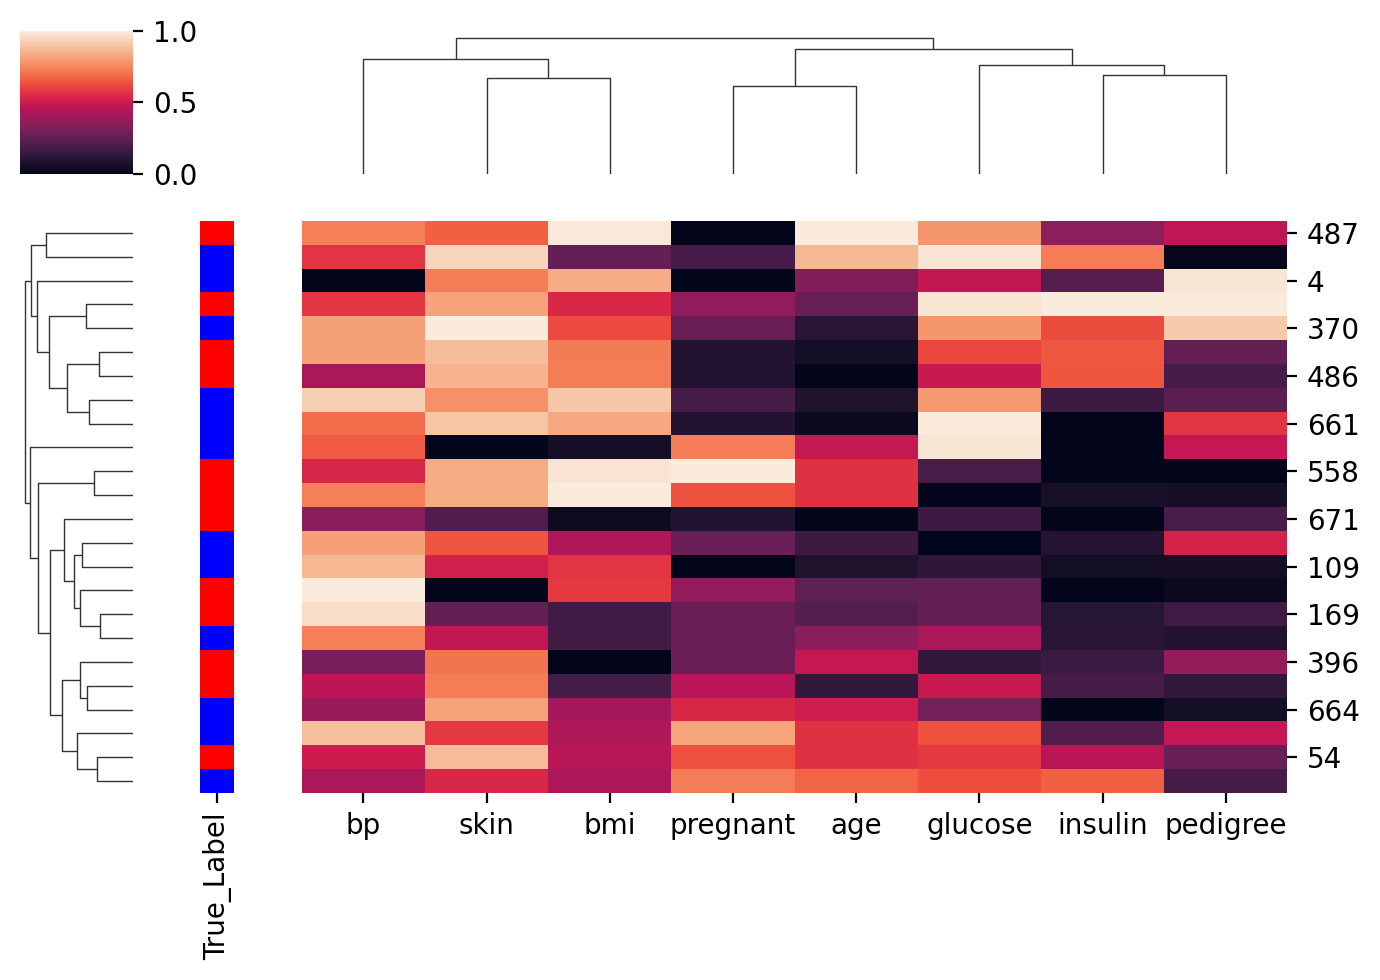

In [ ]:
import seaborn as sns

lut = dict(zip(X_vis_true_label.unique(), "rbg"))
row_colors = X_vis_true_label.map(lut)

sns.clustermap(
    X_vis,
    figsize=(7, 5),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4),
    standard_scale=1,
    # cmap="mako",
    row_colors=row_colors
)

What if we don't resample the dataset?

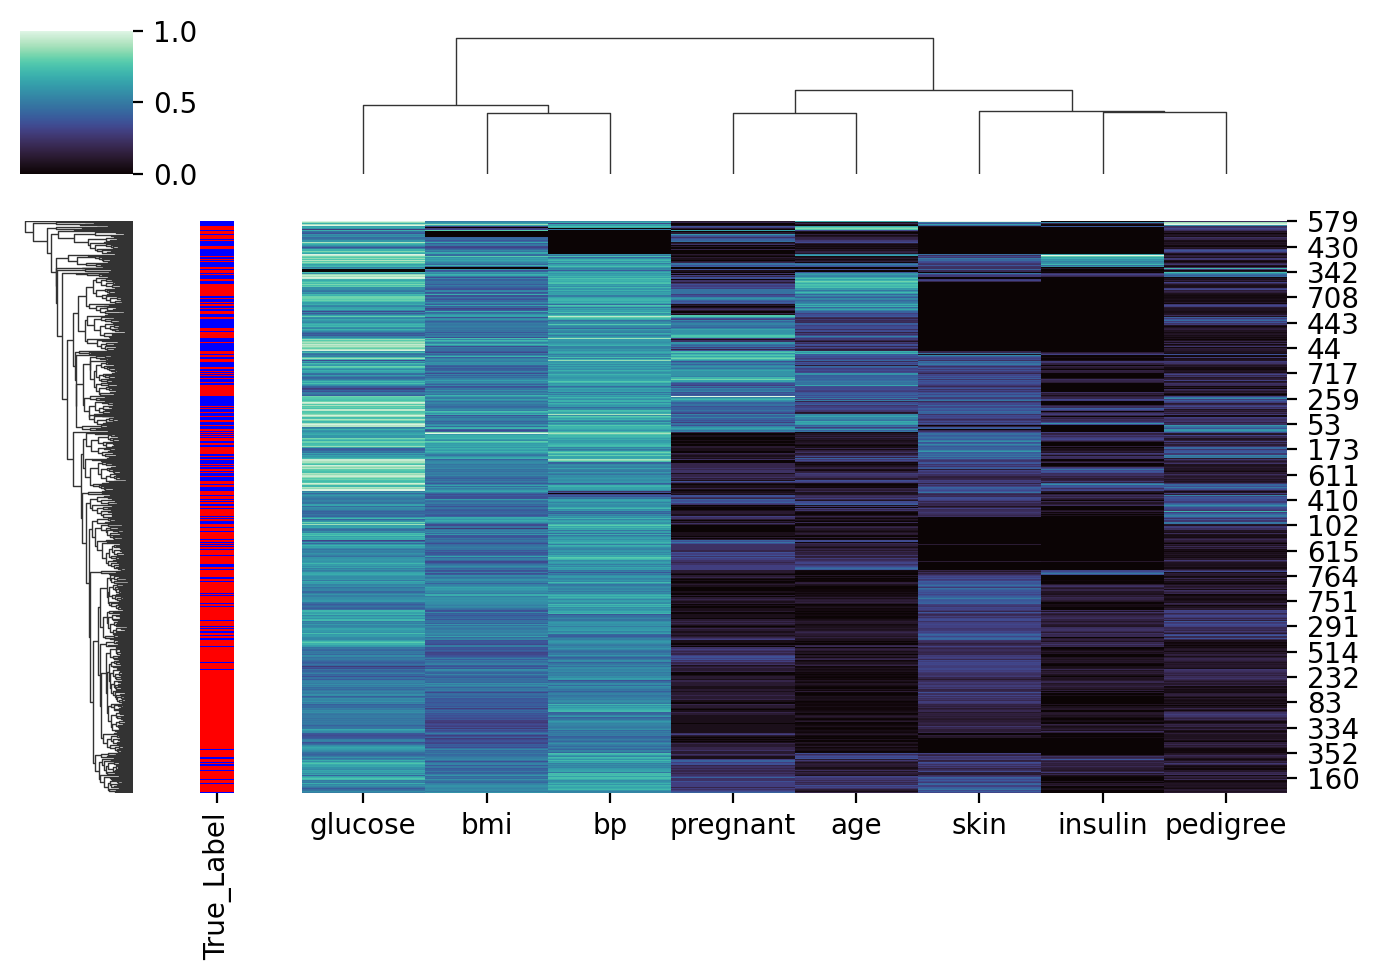

In [ ]:
import seaborn as sns

lut = dict(zip(X_new.True_Label.unique(), "rbg"))
row_colors = X_new.True_Label.map(lut)

sns.clustermap(
    X_new.drop(columns=['cluster','True_Label']),
    figsize=(7, 5),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4),
    cmap="mako", standard_scale=1,
    row_colors=row_colors
)